In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#to know about data set
data = pd.read_csv(r"C:\Users\grithi\OneDrive\Documents\weather_data.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
#to know about data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [4]:
#to find the no of rows and columns in the table
data.shape

(5999, 12)

In [5]:
data.size

71988

In [6]:
#columns present in the data set
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [7]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


# DATA CLEANING

In [8]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [9]:
#remove all the columns that have zero value
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [10]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Temperature (C)           5999 non-null   float64
 2   Apparent Temperature (C)  5999 non-null   float64
 3   Humidity                  5999 non-null   float64
 4   Wind Speed (km/h)         5999 non-null   float64
 5   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 281.3+ KB


In [11]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [12]:
# sorting the formatted date ie, arranging them according to date and time
idata = idata.set_index('Formatted Date')
idata.index

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [13]:
#removing duplicate values in the index(if there are 2 or more values for the same date and time)and keep the first value
idata.index.drop_duplicates(keep='first')

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [14]:
# data after cleaning(removing all the columns containing null values)
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [15]:
# information of data after after cleaning(no null values in the columns and all the datatypes are converted to float)
idata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 2006-01-01 00:00:00+01:00 to 2006-12-31 23:00:00+01:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 410.2+ KB


# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Formatted Date'>

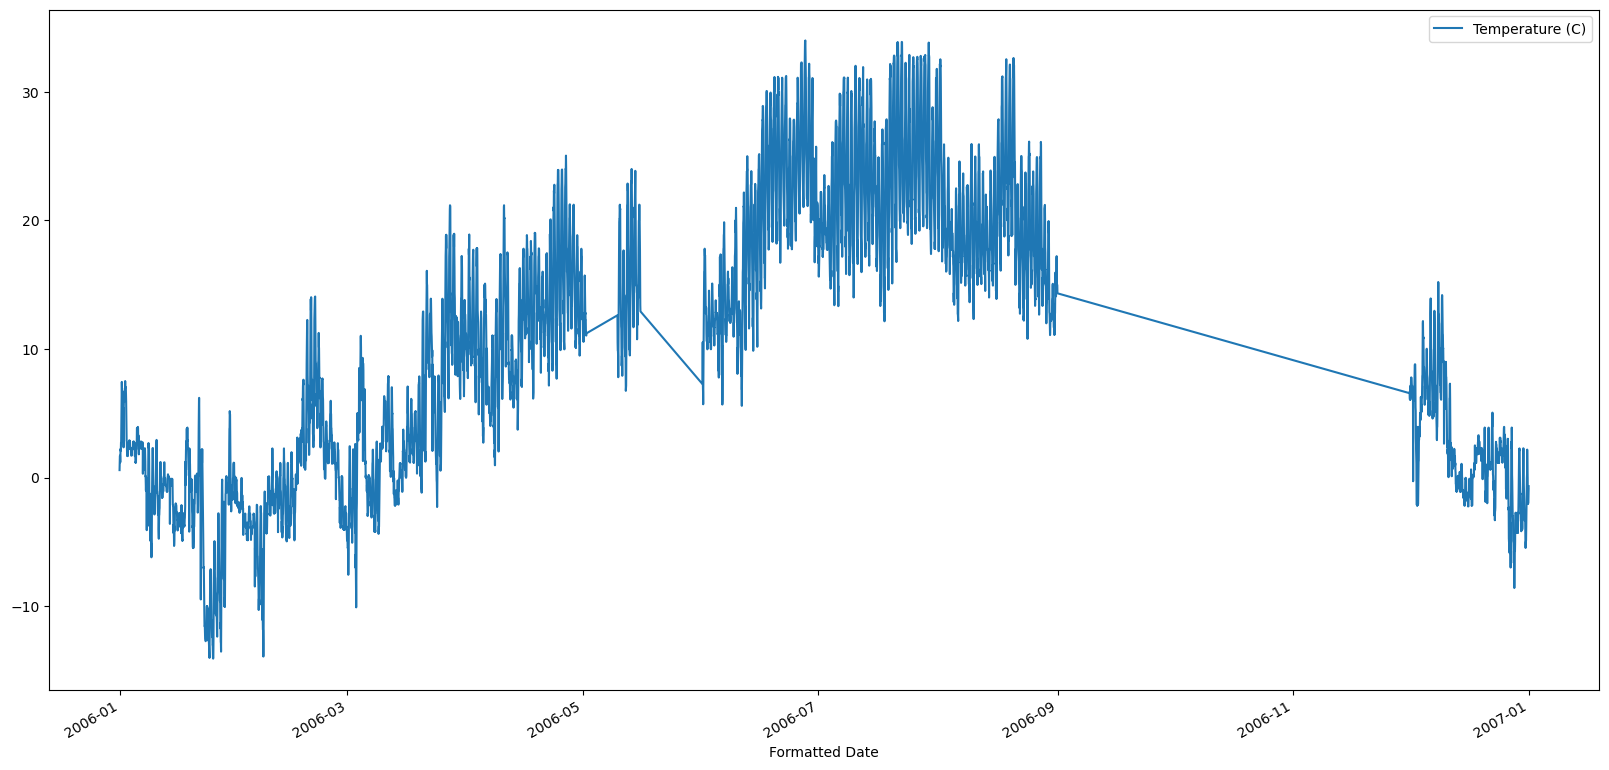

In [16]:
#plotting the data(date vs temperature)
idata.plot(y="Temperature (C)",figsize=(20,10))
#the plot is too much congested so we need to do the sampling

In [17]:
#resampling the data into day format(converting the data into day time)
idata.index = pd.to_datetime(idata.index,utc=True)
idata2 = idata.resample(rule='D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


<Axes: xlabel='Formatted Date'>

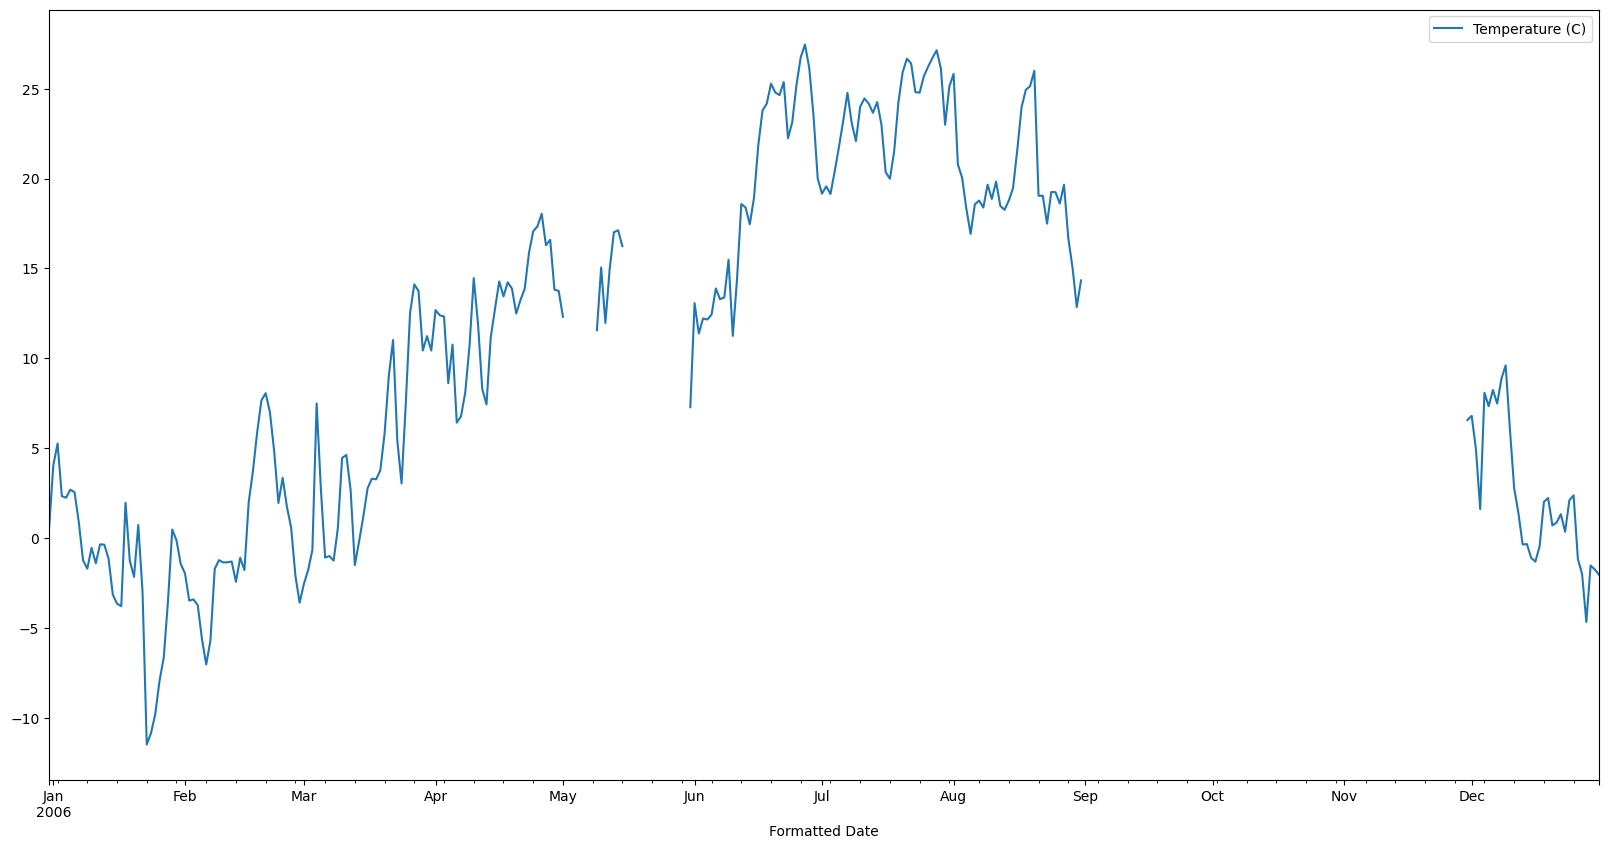

In [18]:
idata2.plot(y="Temperature (C)",figsize=(20,10))
#after sampling, this is how the data looks like
#for some months like may, sept, oct... the data is incomplete

In [19]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


<Axes: xlabel='Formatted Date'>

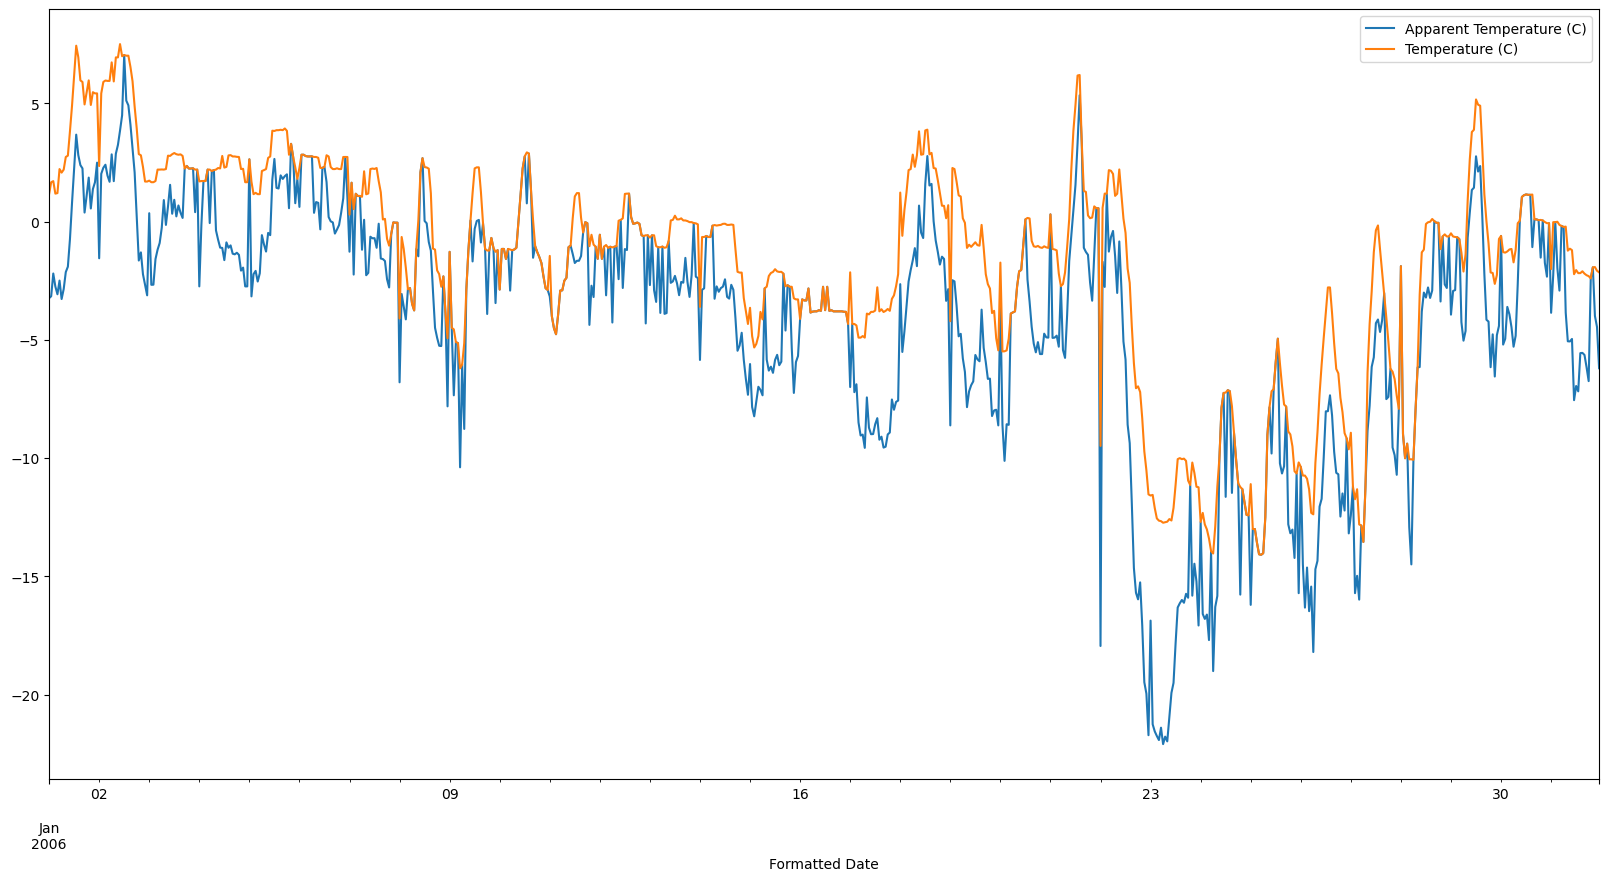

In [20]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))
#the data plot for the month january is too congested, so we do sampling again.

In [21]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


<Axes: xlabel='Formatted Date'>

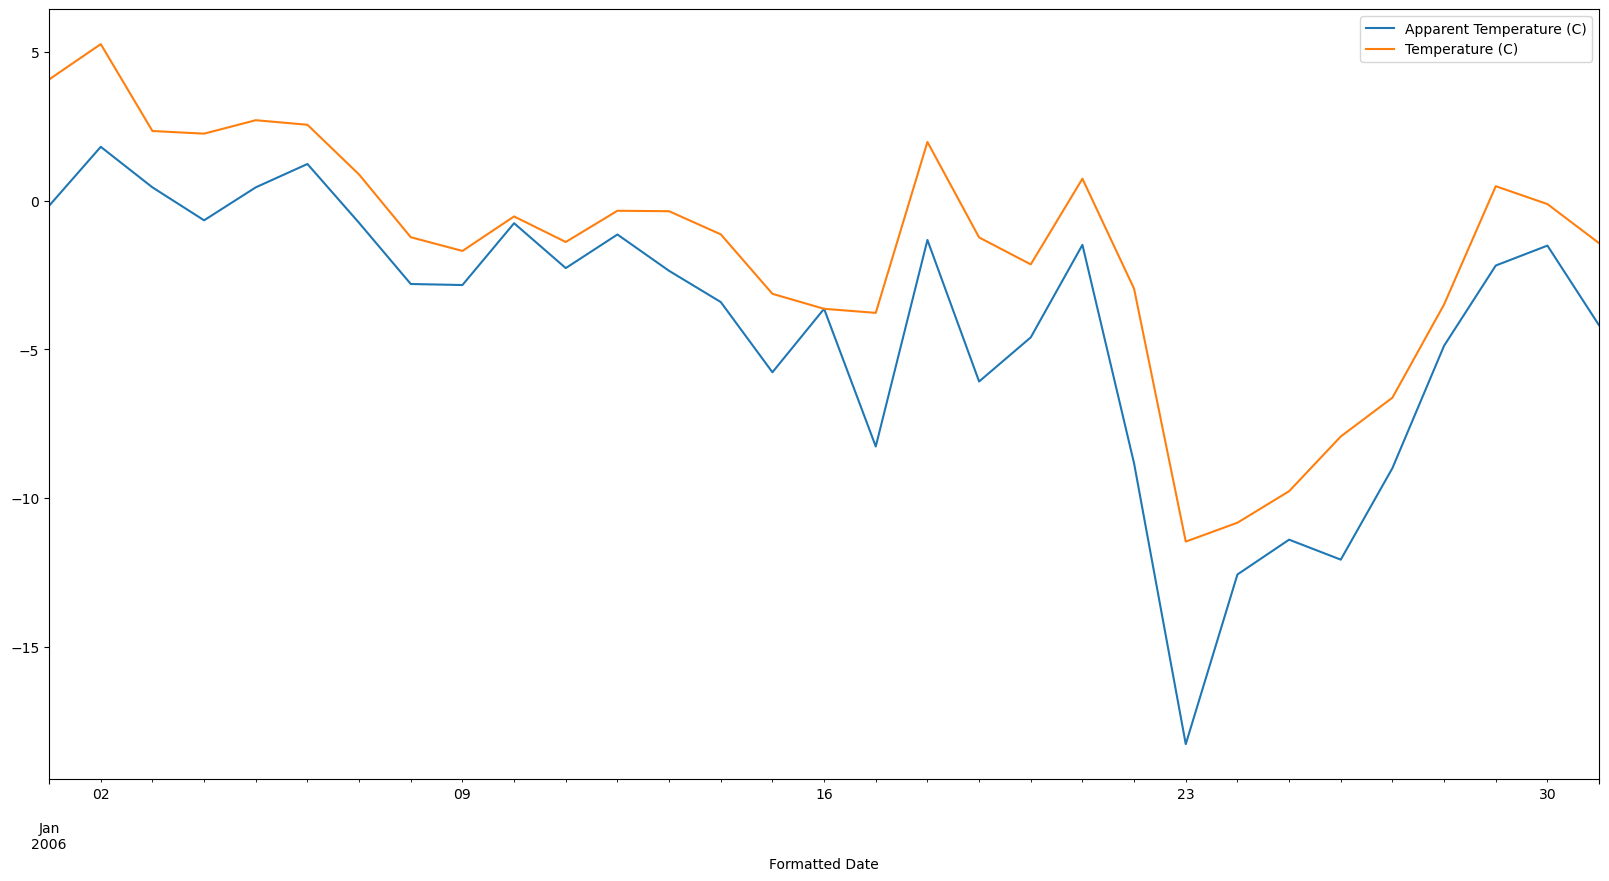

In [22]:

JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))
#the temperature is higher than the apparent temperature

In [23]:
#data for winter, spring and summer
winter = idata2['2006-01-01':'2006-02-28'] #1st jan to 28th jan
winter2 = idata2['2006-12-01':'2006-12-31'] #1st dec to 31st dec
spring = idata2['2006-03-01':'2006-05-31'] #1st mar to 31st may
summer = idata2['2006-06-01':'2006-08-31'] #1st jun to 31st aug

<Axes: xlabel='Formatted Date'>

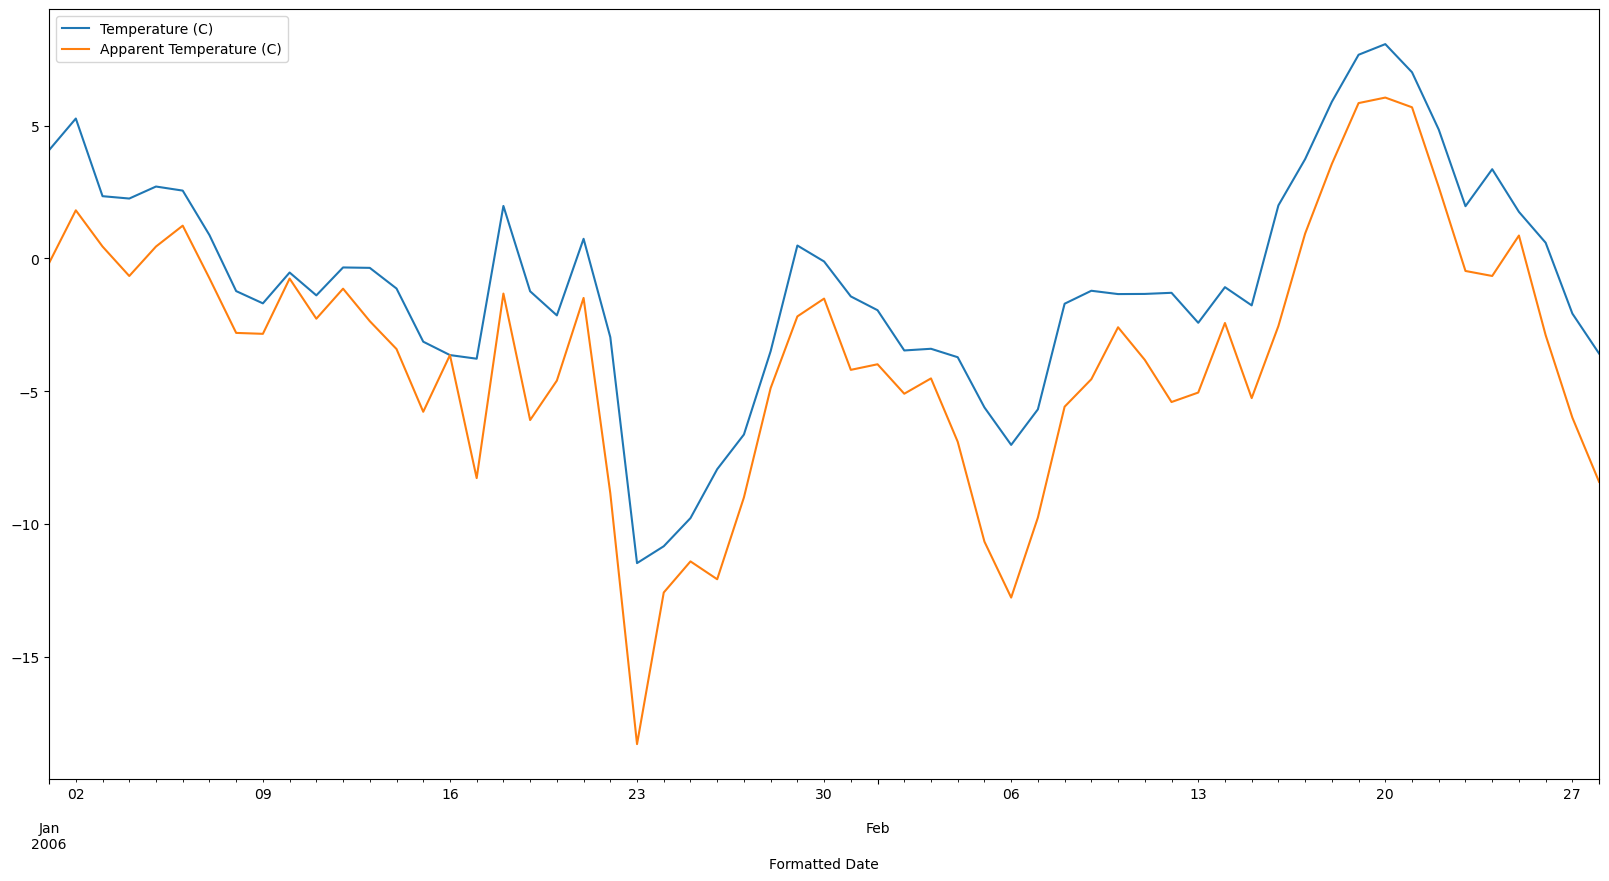

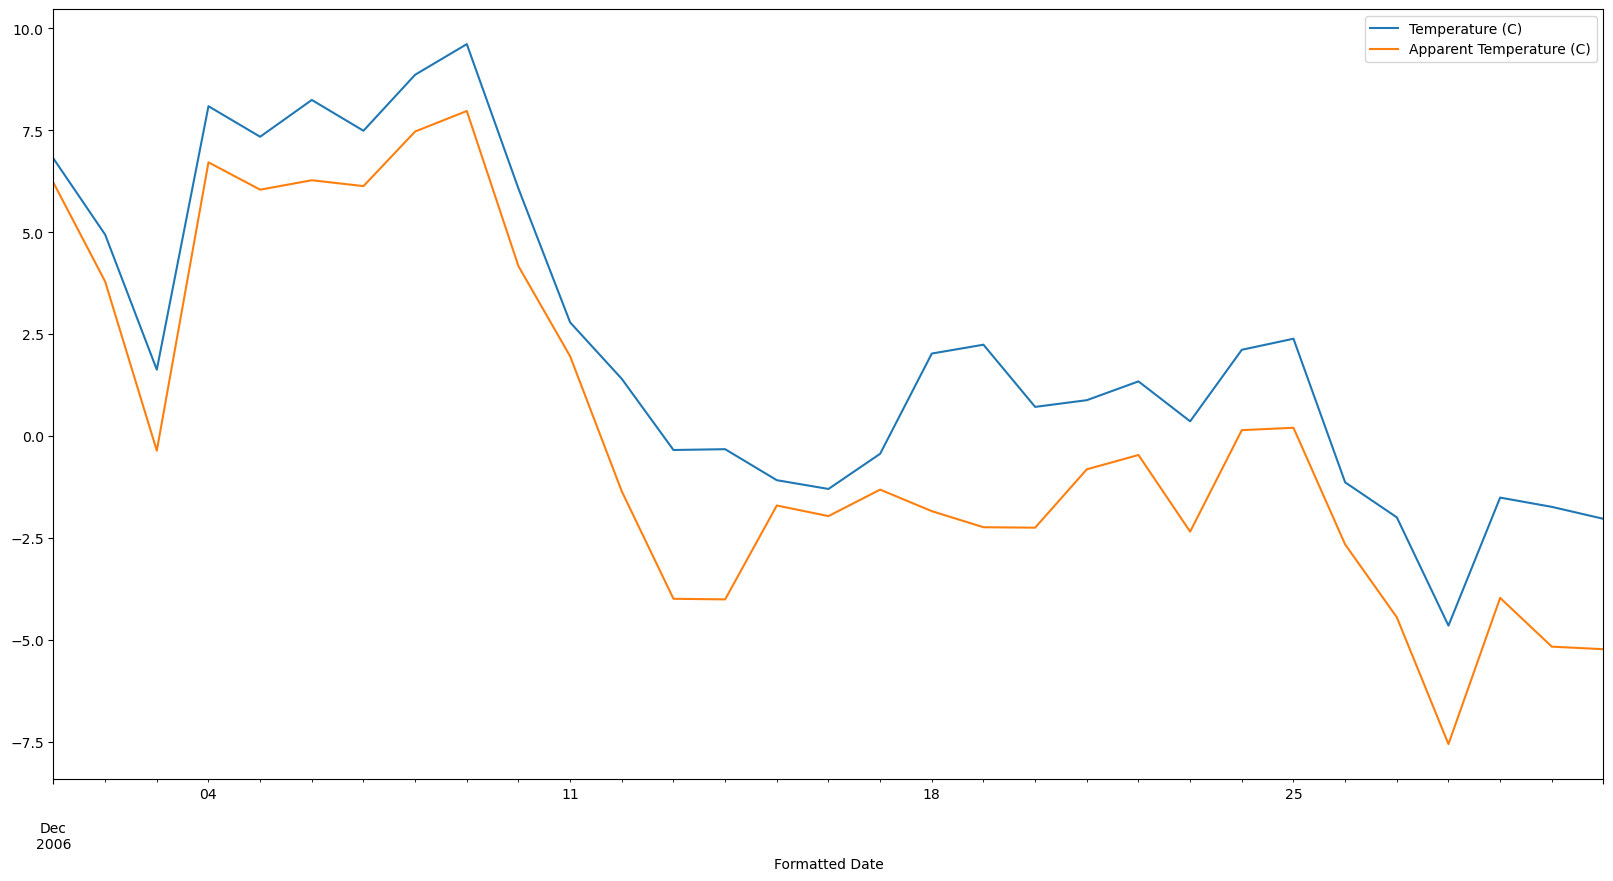

In [24]:
#plotting data for winter
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
#the temperature is higher than the apparent temperature

<Axes: xlabel='Formatted Date'>

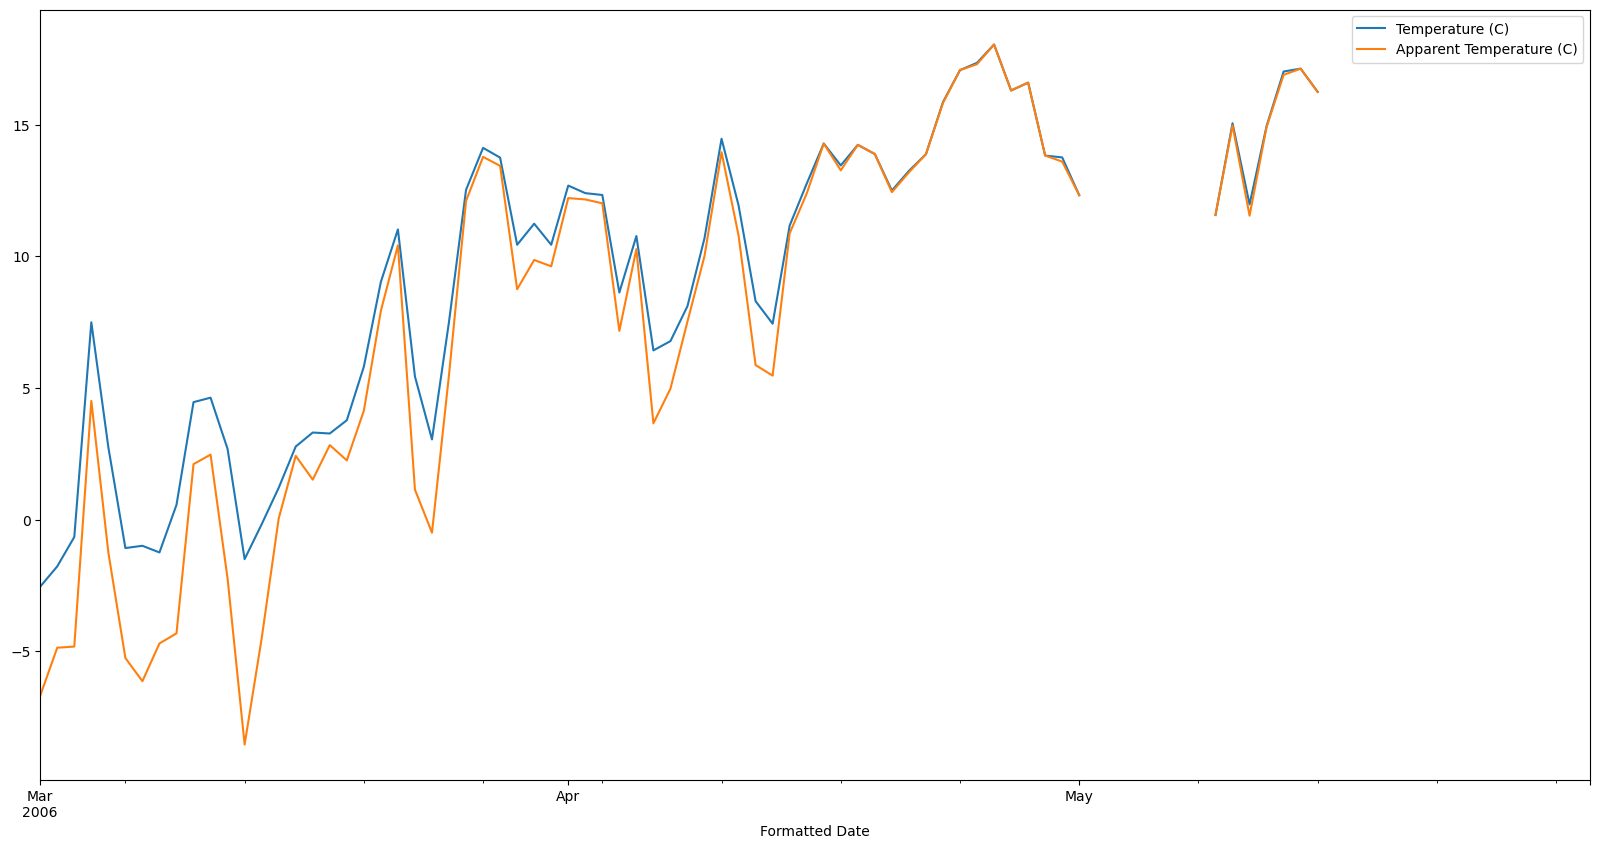

In [25]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

<Axes: xlabel='Formatted Date'>

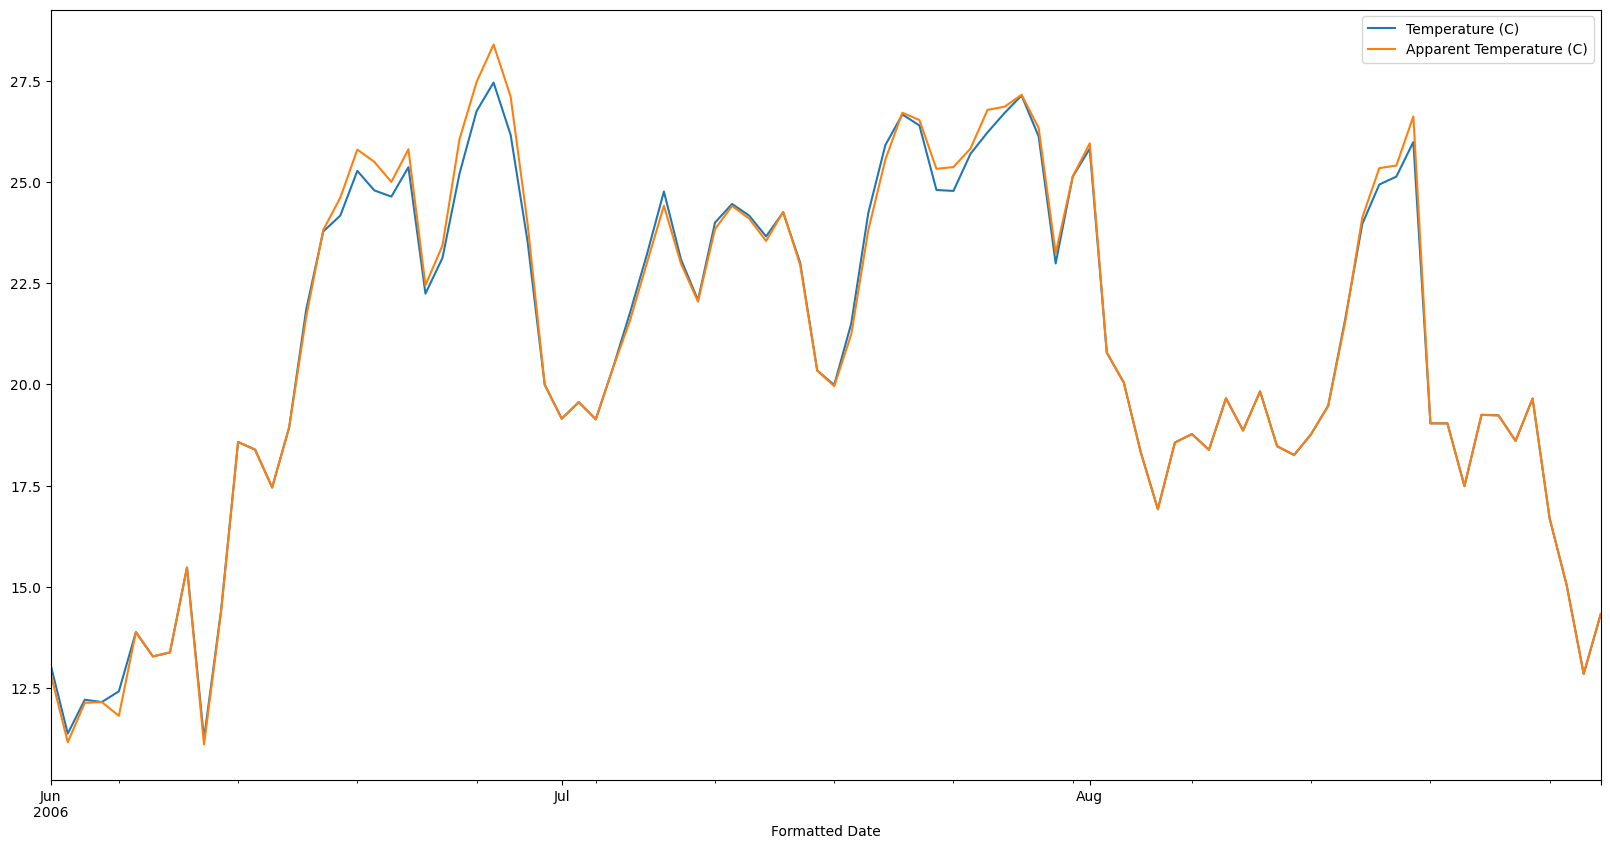

In [26]:

summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

# Correlation in data

In [27]:

#checking correlation between the cols
data.corr(numeric_only=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


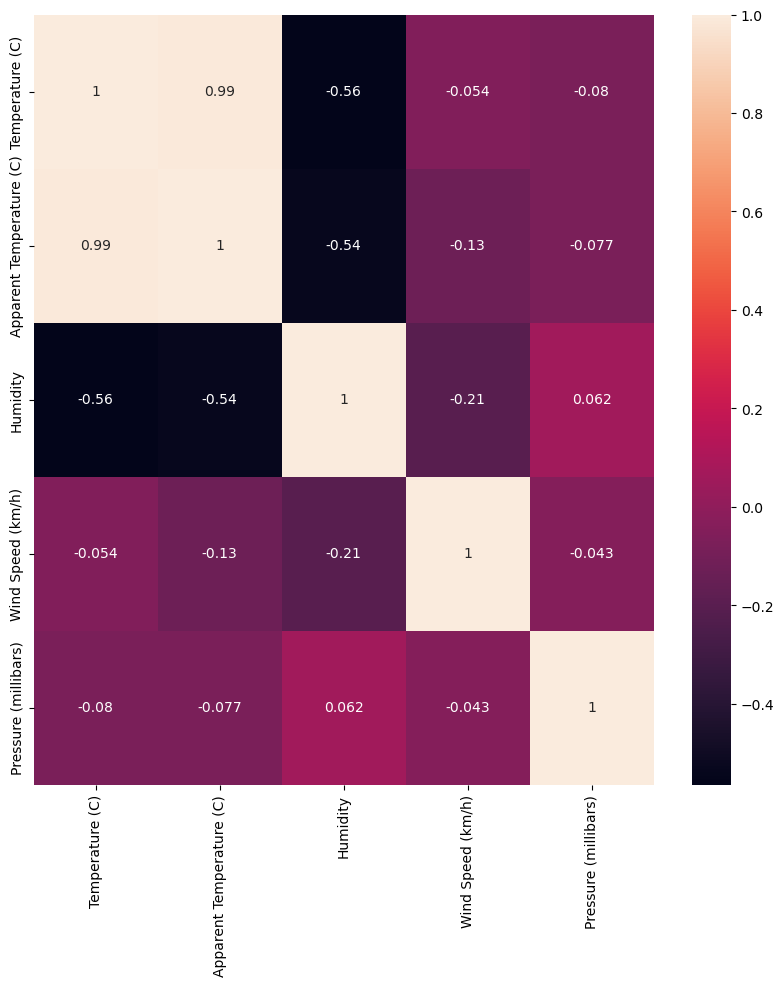

In [28]:
#plotting the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

# Data Visualization

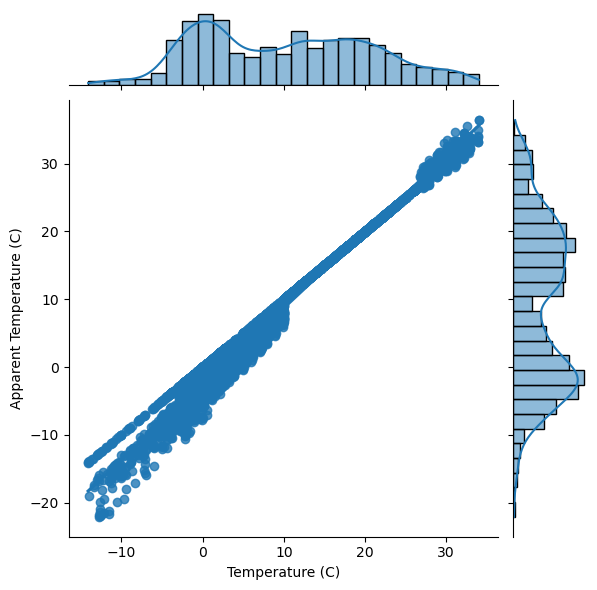

In [29]:
sns.jointplot(x='Temperature (C)',y= 'Apparent Temperature (C)',kind="reg", data=data)

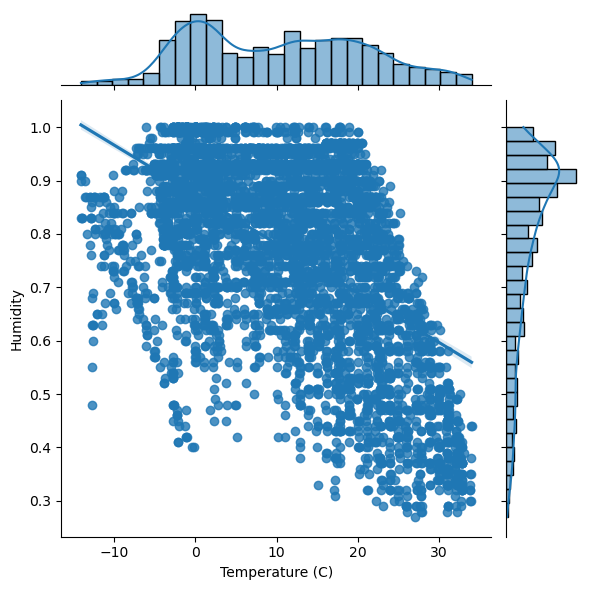

In [30]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

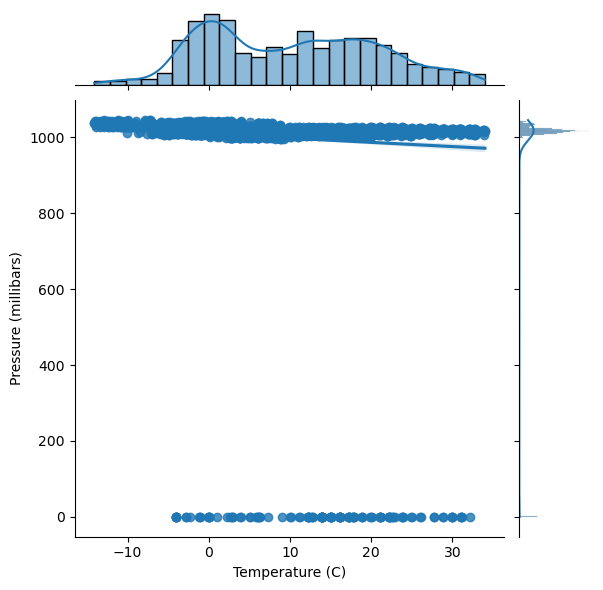

In [31]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

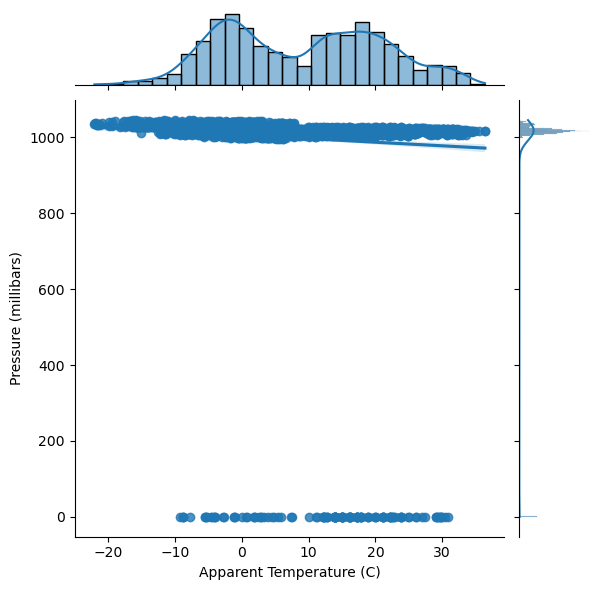

In [32]:
sns.jointplot(x='Apparent Temperature (C)',y='Pressure (millibars)',kind="reg", data=data)

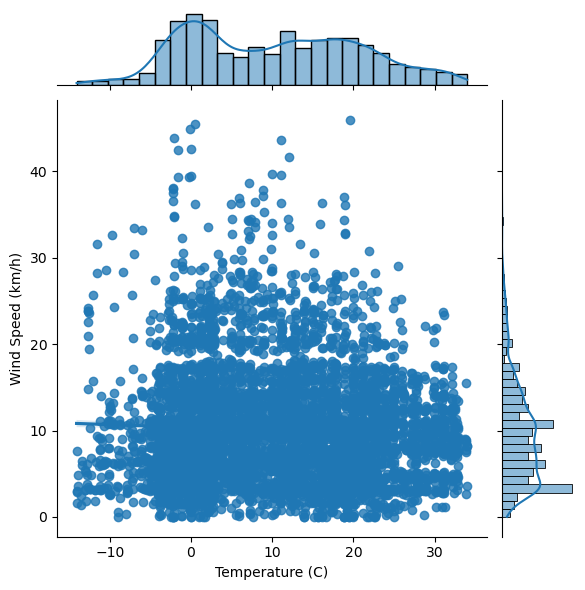

In [33]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

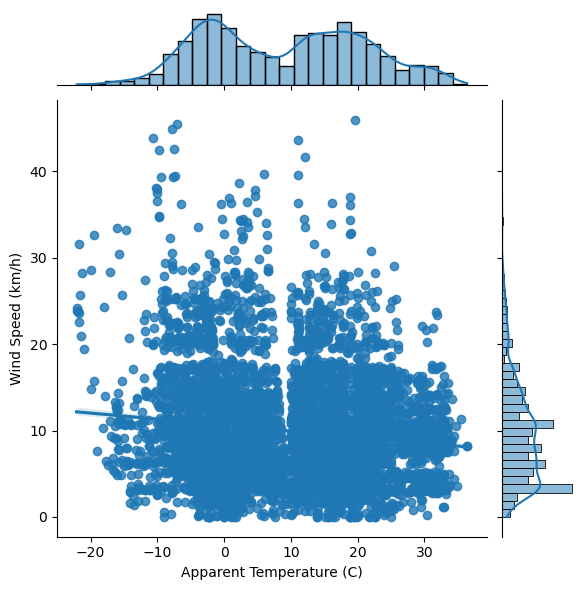

In [34]:
sns.jointplot(x='Apparent Temperature (C)',y='Wind Speed (km/h)',kind="reg", data=data)
plt.show()

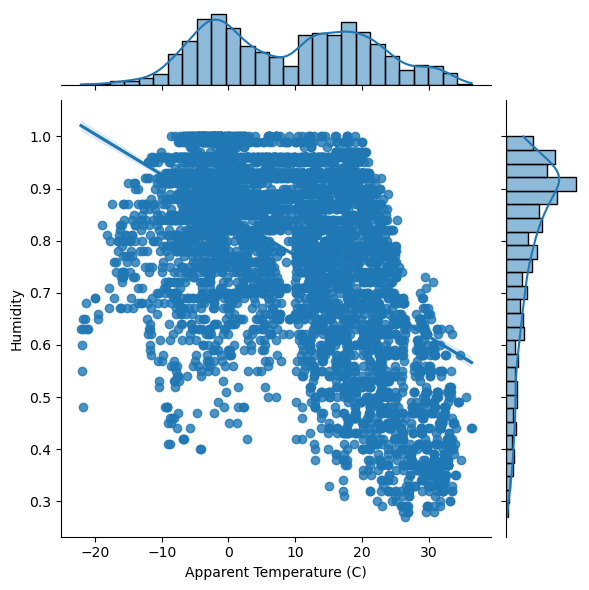

In [35]:
sns.jointplot(x='Apparent Temperature (C)', y='Humidity', kind="reg", data=data)
plt.show()

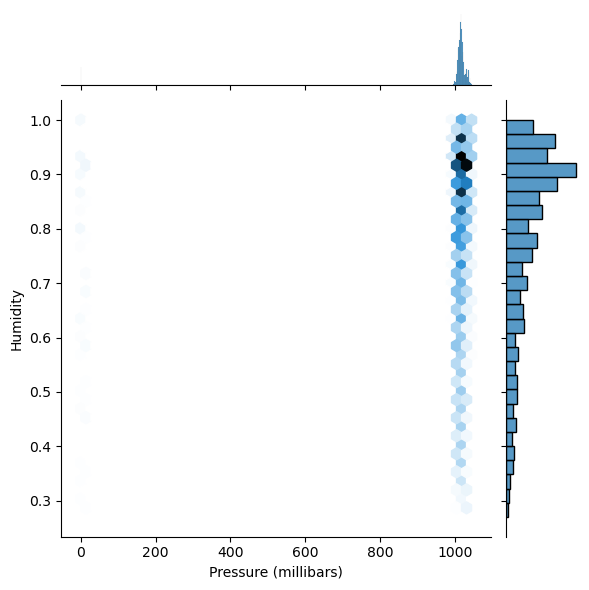

In [36]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

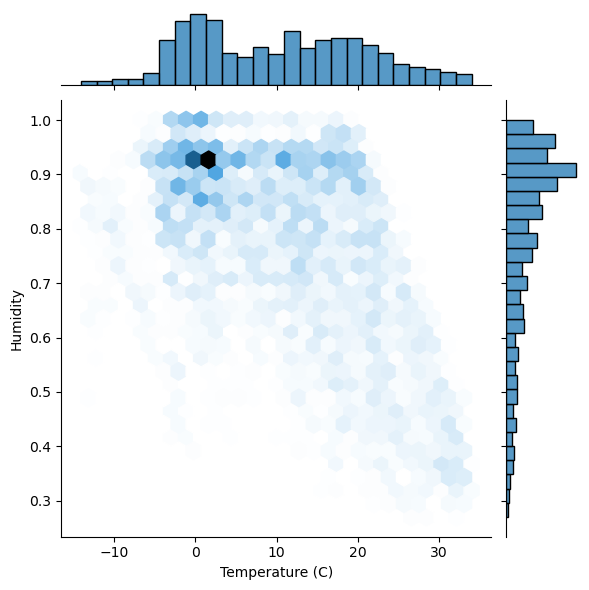

In [37]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

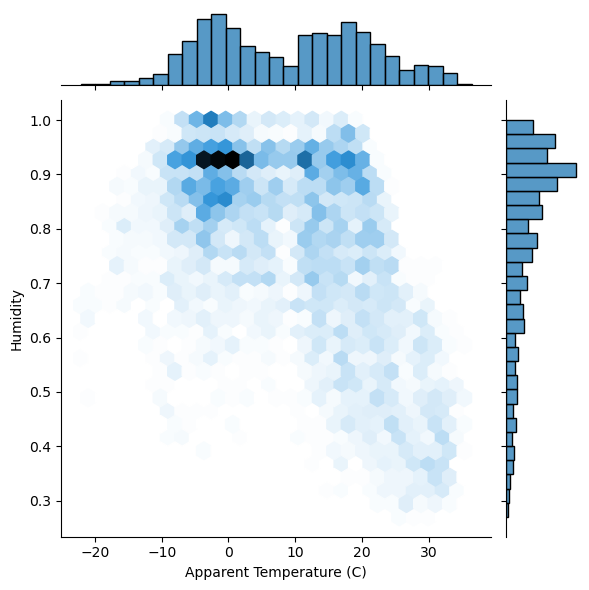

In [38]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 2000x2000 with 0 Axes>

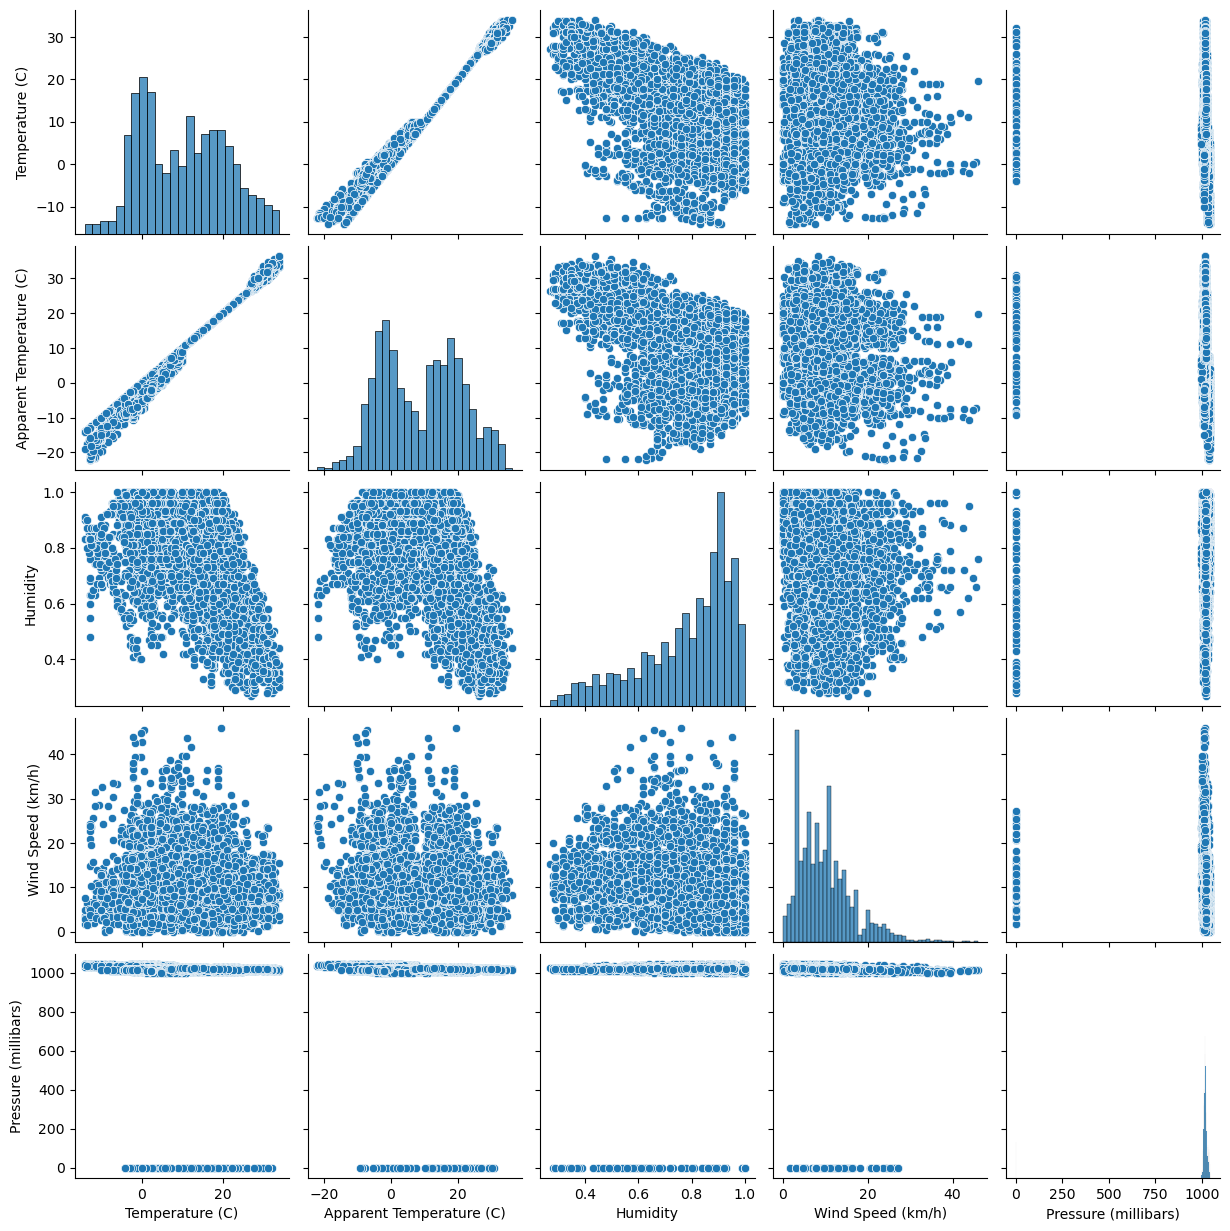

In [39]:
plt.figure(figsize =(20,20))
sns.pairplot(data)
plt.show()

In [40]:
#taking 70% of the data for training
X = idata['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [41]:
#30% of data for testing
X1 = idata['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [42]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00+00:00 to 2006-07-20 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       4248 non-null   float64
 1   Humidity              4248 non-null   float64
 2   Wind Speed (km/h)     4248 non-null   float64
 3   Pressure (millibars)  4248 non-null   float64
dtypes: float64(4)
memory usage: 165.9 KB


In [43]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [44]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression()

In [45]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82
...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,0.96,10.8997,1034.92


In [46]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
                               ...    
2006-12-31 18:00:00+00:00    -4.211111
2006-12-31 19:00:00+00:00    -5.888889
2006-12-31 20:00:00+00:00    -5.327778
2006-12-31 21:00:00+00:00    -4.961111
2006-12-31 22:00:00+00:00    -4.138889
Name: Apparent Temperature (C), Length: 1750, dtype: float64

In [47]:
#predicting the Apparent Temperature
y_pred = regr.predict(X_test)

In [48]:
regr.score(X_test,Y_test)
#reg score is 0.9923
#so our model is 99.23% correct

0.9923934744917491

# Showing the Actual Apparent Temperature and the predicted Apparent Temperature

In [49]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df
#comparison for apparent and actual values

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674
...,...,...
2006-12-31 18:00:00+00:00,-4.211111,-3.313653
2006-12-31 19:00:00+00:00,-5.888889,-4.733725
2006-12-31 20:00:00+00:00,-5.327778,-4.206968


In [50]:
print("Apparent temperature prediction")

Apparent temperature prediction


# project completed